In [1]:
import tensorflow as tf

In [37]:
import keras
import math

In [38]:
y_true = [1, 2]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
# Using 'auto'/'sum_over_batch_size' reduction type.  
scce = tf.keras.losses.SparseCategoricalCrossentropy()
scce(y_true, y_pred).numpy()
# 1.177

1.1769392

In [647]:
def calcEntropy(y_hat):
        #entropy is the sum of y * log(y) for all possible labels.
        if isinstance(y_hat, list):
            y_hat = np.array(y_hat)
        sum_entropy = 0
        if y_hat.ndim >1:
            return list(map(calcEntropy,y_hat))
        for i in range(len(y_hat)):
            if y_hat[i] != 0: # log of zero is undefined, see MacKay's book "Information Theory, Inference, and Learning Algorithms"  for more info on this workaround reasoning.
                entropy =y_hat[i] * math.log(y_hat[i],2)
                sum_entropy +=  entropy

        return -sum_entropy
    
def calcEntropy_Tensors(y_hat):
        #entropy is the sum of y * log(y) for all possible labels.
        #doesn't deal with cases of log(0)
        rank = tf.rank(y_hat)
        def calc_E(y_hat):
            return tf.reduce_sum(y_hat * tf.experimental.numpy.log2(y_hat))

        sumEntropies = (tf.map_fn(calc_E,tf.cast(y_hat,'float')))
        
        if rank == 1:
            sumEntropies = tf.reduce_sum(sumEntropies)
        return -sumEntropies
    

In [648]:
p = 0.5
h = -math.log(p,2)
#1 = all possibilities equal
#0 = only one possibility 
print(calcEntropy([[.9,.5, .6, .5, .5, .5],[.8,.5, .6, .5, .5, .5],[.7,.5, .6, .5, .5, .5]]))
print(calcEntropy([[.9,.5, .6, .5, .5, .5]]))

# y_true = tf.constant([[2],[2],[0]])

y_pred = tf.constant([[.9,.5, .6, .5, .5, .5],[.8,.5, .6, .5, .5, .5],[.7,.5, .6, .5, .5, .5]])

# print(calcEntropy_Tensors(y_pred))

# print(calcEntropy_Tensors([[.9,.5, .6, .5, .5, .5]]))
print('----')
# print('E',calcEntropy([.5,.5]))
print("calc",calcEntropy_Tensors([[0,.5],[.6,.4]]))
# print("calc",calcEntropy_Tensors([.1,.5]))

# x = tf.constant([.5])
# %timeit tf.experimental.numpy.log2(x) 

# %timeit calcEntropy_Tensors([[.1,.5],[.6,.4]])

# %timeit calcEntropy([[.1,.5],[.6,.4]])




[2.5789821406002686, 2.6997218324096135, 2.8023805774805544]
[2.5789821406002686]
----
calc tf.Tensor([      nan 0.9709506], shape=(2,), dtype=float32)


[0.0001151292546497023, 0.04608774856340663, 0.07826957783903377, 0.10522180083209112, 0.12877722050308088, 0.14980657000050177, 0.16882277627948275, 0.1861647944714121, 0.20207354820612955, 0.21672918367922003, 0.23027153465035116, 0.2428123127454695, 0.2544428265627178, 0.26523910953213187, 0.275265460663626, 0.2845769685994051, 0.29322135970187363, 0.30124038240272627, 0.3086708647630551, 0.31554553634502863, 0.3218936766159486, 0.32774163337497153, 0.3331132422286076, 0.338030169655869, 0.34251219630886093, 0.34657745302358656, 0.35024261901549286, 0.35352308954363276, 0.35643311870579736, 0.35898594181161725, 0.36119388085915927, 0.36306843593443944, 0.3646203648068603, 0.36585975256686326, 0.3667960728160125, 0.3674382416529264, 0.367794665485101, 0.3678732835248303, 0.36768160568813296, 0.3672267465019881, 0.3665154555319818, 0.36555414476559384, 0.36434891332261404, 0.3629055698110722, 0.3612296526026105, 0.35932644826384913, 0.35720100834873847, 0.354858164730136, 0.3523025436

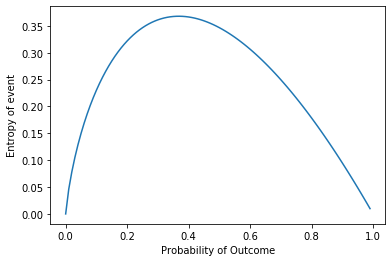

In [186]:
(math.log(0.999999,2))


import matplotlib.pyplot as plt
import numpy as np

def entropy(x):
    return -(x * math.log(x))
# Data for plotting
t = np.arange(0.00001, 1, 0.01)
p = list(map(entropy,t))
print(p)
fig, ax = plt.subplots()
ax.plot(t, p)
ax.set(xlabel='Probability of Outcome',ylabel='Entropy of event')

plt.show()

(100,)


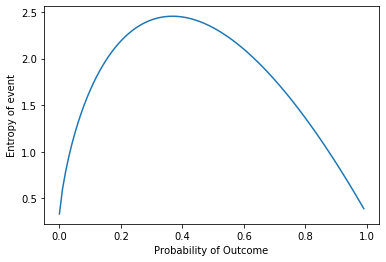

In [191]:
#sum entropy 
import pandas as pd
def entropy(x):
    return -(x * math.log(x))
# Data for plotting
t = np.arange(0.00001, 1, 0.01)
print(t.shape)
t_ = np.full((100,), .1)
df = pd.DataFrame([t,t,t_,t,t])
# print(df.transpose())
p = df.apply(calcEntropy,axis=0)
# print(p)
# print(p)
fig, ax = plt.subplots()
ax.plot(t, p)
ax.set(xlabel='Probability of Outcome',ylabel='Entropy of event')

plt.show()


In [85]:
y_true = [0]
y_pred = [.99,.01, .01, .0, .01, .01]
# Using 'auto'/'sum_over_batch_size' reduction type.  
scce = tf.keras.losses.SparseCategoricalCrossentropy()
crossE = scce(y_true, y_pred).numpy()
print("crossE: ",crossE)

crossE:  0.039609063


In [246]:
y_true = [0,1,0,0,0,0]
y_pred = [.99,.01, .01, .0, .01, .01]
# Using 'auto'/'sum_over_batch_size' reduction type.  
scce = tf.keras.losses.CategoricalCrossentropy()
crossE = scce(y_true, y_pred).numpy()
print("crossE: ",crossE)

crossE:  4.634729


In [103]:
y_true = [0]
y_pred = [.0,.01, .9, .0, .0, .0]
ent = calcEntropy(y_pred)
print("Entropy: ",ent)
loss = ent *1
print("Loss: ",loss)

y_hat [0.0, 0.01, 0.9, 0.0, 0.0, 0.0]
Entropy:  0.20324134599829222
Loss:  0.20324134599829222


In [305]:
y_true = [[0],[0],[0]]
y_pred = [[.9,.5, .6, .5, .5, .5],[.8,.5, .6, .5, .5, .5],[.7,.5, .6, .5, .5, .5]]
y_pred = [[.9,.0,.0,.0,.0,.0,],[.8,.5, .6, .5, .5, .5],[.7,.5, .6, .5, .5, .5]]
# y_pred = [.1,.1, .1, .1, .1, .1]
# Using 'auto'/'sum_over_batch_size' reduction type.  
scce = tf.keras.losses.SparseCategoricalCrossentropy()
crossE = scce(y_true, y_pred).numpy()
print("crossE: ",crossE)

''' When the answer is correct, CrossE goes down
    When 
    When its wrong, Entropy High
    When its right, Entropy Low
    
    so penalize being right with low entropy and reward being right with high entropy
    
    
    OORRRR train a second model for a branch to determine if you are going to get it right or not?
    Isn't that what ResNet Did? you calculate if the blocks will contribute, was it block drop?
    Binary classification,
    could be done at the branch end as a separate evaulator, using the entropy score and the input to the branch as inputs?
'''


ent = calcEntropy(y_pred)
print("Entropy: ",ent)
loss = crossE + ent
print("combined Loss: ",loss)

crossE:  0.9991724
Entropy:  [0.13680278410054497, 2.6997218324096135, 2.8023805774805544]
combined Loss:  [1.13597517 3.69889422 3.80155297]


In [371]:
x = [[.1,.1, .675, .1091, .4311, .1875,.121,.143,.2,.5]]
x = tf.constant([[2, 20, 30, 3, 6], [3, 11, 16, 1, 8],
                 [14, 45, 23, 5, 27]])

print(list(map(np.argmax,np.array(x))))
def foo(y_pred):
    y_pred = y_pred.numpy()
    pred_label = list(map(np.argmax,np.array(y_pred)))
    return pred_label
%timeit foo(x)

[2, 2, 1]
10 µs ± 186 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [462]:
y_true = tf.constant([[2],[2],[0]])
A = tf.constant([.1,.1, .675, .1091, .4311, .1875,.121,.143,.2,.5])
B = tf.constant([[2, 20, 30, 3, 6], [3, 11, 16, 1, 8],
                 [14, 45, 23, 5, 27]])

y_pred = tf.constant([[.9,.5, .6, .5, .5, .5],[.8,.5, .6, .5, .5, .5],[.7,.5, .6, .5, .5, .5]])

# new_list = new_list = [list(range(10)) for _ in range(10)]

print(tf.math.argmax(y_pred,1))
pred_labels = tf.math.argmax(y_pred,1)
print(tf.reshape(y_true,pred_labels.shape))
indexes = tf.where(tf.math.equal(pred_labels, tf.cast(tf.reshape(y_true,pred_labels.shape),'int64')))
indexes = tf.reshape(indexes,[-1])
# print(tf.gather(B,indexes))
CorrectE = tf.gather(y_pred,indexes)
print(CorrectE)
# print(calcEntropy(CorrectE[0]))


results = tf.map_fn(calcEntropy,tf.cast(CorrectE,'float'))
print("results: ",results)



%timeit tf.map_fn(calcEntropy,tf.cast(CorrectE,'float'))


crossE = tf.keras.losses.SparseCategoricalCrossentropy()
crossE(y_true,y_pred)
%timeit crossE(y_true,y_pred)
# [
#     [
#         [ 2 20 30  3  6]
#     ]
#     [
#         [ 3 11 16  1  8]
#     ]
# ]

tf.Tensor([0 0 0], shape=(3,), dtype=int64)
tf.Tensor([2 2 0], shape=(3,), dtype=int32)
tf.Tensor([[0.7 0.5 0.6 0.5 0.5 0.5]], shape=(1, 6), dtype=float32)
results:  tf.Tensor([2.8023806], shape=(1,), dtype=float32)
1.34 ms ± 41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.15 ms ± 36.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [478]:
y_true = tf.constant([[2],[2],[0]])
y_pred = tf.constant([[.9,0, .6, .5, .5, .5],[.8,.5, .6, .5, .5, .5],[.7,.5, .6, .5, .5, .5]])

def entropyAddition(y_true, y_pred):
    crossE = tf.keras.losses.SparseCategoricalCrossentropy()
    #Entropy is added to the CrossE divided by the len of inputs
    pred_labels = tf.math.argmax(y_pred,1)
    indexes = tf.where(tf.math.equal(pred_labels, tf.cast(tf.reshape(y_true,pred_labels.shape),'int64')))
    indexes = tf.reshape(indexes,[-1])
    entropies = tf.gather(y_pred,indexes)
    if tf.equal(tf.size(entropies), 0):
        correctEntropies = 0
    else:
        correctEntropies = tf.reduce_mean(tf.map_fn(calcEntropy,tf.cast(entropies,'float')))
    scce = crossE(y_true, y_pred)
    loss = correctEntropies + scce
    return loss


print(entropyAddition(y_true, y_pred))
%timeit entropyAddition(y_true, y_pred)

tf.Tensor(4.433926, shape=(), dtype=float32)
3.1 ms ± 39.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [388]:
y_true = [[0],[0],[0]]
y_pred = [[.9,.5, .6, .5, .5, .5],[.8,.5, .6, .5, .5, .5],[.7,.5, .6, .5, .5, .5]]

def foo(x, y):
    scce = tf.keras.losses.SparseCategoricalCrossentropy()
    crossE = scce(x, y).numpy()
    return crossE

%timeit foo(y_true,y_pred)

1.34 ms ± 67.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [356]:
y_true = [[2],[2],[0]]
y_pred = [[.5,.5, .6, .5, .5, .5],[.5,.5, .6, .5, .5, .5],[.5,.5, .6, .5, .5, .5]]

y_true = [[2]]
y_pred = [[.1,.1, .15, .1, .1, .1]]
def entropyAddition_loss():
    #create a wrapper function that returns a function
    crossE = tf.keras.losses.SparseCategoricalCrossentropy()
    def entropyAddition(y_true, y_pred):
        #Entropy is added to the CrossE divided by the len of inputs
        pred_labels = tf.math.argmax(y_pred,1)
        indexes = tf.where(tf.math.equal(pred_labels, tf.cast(tf.reshape(y_true,pred_labels.shape),'int64')))
        indexes = tf.reshape(indexes,[-1])
        entropies = tf.gather(y_pred,indexes)
        correctEntropies = tf.reduce_mean(tf.map_fn(calcEntropy,tf.cast(entropies,'float')))
#         print(pred_label)
        scce = crossE(y_true, y_pred)
        sumEntropy = 0
        loss = correctEntropies + scce
        return loss
    
    return entropyAddition

def custom_loss_multi(y_true, y_pred):
    #CrossE is multiplied by the Entropy
    pred_label = list(map(np.argmax,np.array(y_pred)))
    crossE = tf.keras.losses.SparseCategoricalCrossentropy()
    sumLoss = 0
    
    for i in range(len(y_pred)):
        loss = crossE(y_true[i], y_pred[i])
#         print('crossE: ',loss)
        if pred_label[i] == y_true[i]:
#             print('calcEntropy ',calcEntropy(y_pred[i]))
            loss = loss * calcEntropy(y_pred[i])
        sumLoss += loss
    sumLoss = sumLoss / len(y_pred)         
    
#     loss = crossE(y_true, y_pred)
#     print("CrossE : ",loss.numpy())
#     print("Loss : ",sumLoss)
    return sumLoss
    ### I want to reduce the entropy of correct answers
    ### if label - pred = 0 (aka correct) then add entropy to crossE
    
    
#     squared_difference = tf.square(np.array(y_true) - np.array(y_pred))
#     return tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`

scce = tf.keras.losses.SparseCategoricalCrossentropy()
crossE = scce(y_true, y_pred).numpy()
print("crossEntropyLoss: ",crossE)


crossE = custom_loss_addition(y_true, y_pred).numpy()
print("customLoss_addition: ",crossE)


crossE = custom_loss_multi(y_true, y_pred).numpy()
print("customLoss_multi: ",crossE)

  
# model.compile(loss=custom_loss, optimizer='adam')



crossEntropyLoss:  1.466337
[2]
Entropy :  2.071508886568612
customLoss_addition:  3.5378458
customLoss_multi:  3.03753


In [350]:

def sub(x,y):
    if x - y == 0:
        return 1
%timeit sub(5,5)

115 ns ± 1.17 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [326]:

def sub(x,y):
    if x == y:
        return 0
    
%timeit sub(5,5)

98.8 ns ± 1.13 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
